In [18]:
import os
import pandas as pd
from autoemulate.core.compare import AutoEmulate
from autoemulate.core.sensitivity_analysis import SensitivityAnalysis
from ModularCirc import BatchRunner
import torch
figsize = (9, 5)

In [19]:
param_filename = 'parameters_naghavi_constrained_fixed_T_v_tot_v_ref_lower_k_pas'

n_samples = 8192

simulation_out_path = f'../outputs/simulations/output_{n_samples}_samples_{param_filename}/'

parameters_json_file = os.path.join(simulation_out_path, 'parameters.json')

# Load the simulation input parameters
input_params = pd.read_csv(os.path.join(simulation_out_path, f'input_samples_{n_samples}.csv'))

# Load the summary statistics
summary_stats = pd.read_csv(os.path.join(simulation_out_path, f'simulations_summary.csv'))

output_to_emulate = 'p_ao_max'

In [20]:
# Use ModularCirc's BatchRunner to condense parameter names. This requires setting up the sampler first.
br = BatchRunner()

br.setup_sampler(parameters_json_file)

br._parameters_2_sample

{'ao.r': (195.0, 325.0),
 'ao.c': (0.22499999999999998, 0.375),
 'art.r': (843.75, 1406.25),
 'art.c': (2.25, 3.75),
 'ven.r': (6.75, 11.25),
 'ven.c': (84.975, 141.625),
 'av.r': (4.5, 7.5),
 'mv.r': (3.0749999999999997, 5.125),
 'la.E_pas': (0.22499999999999998, 0.375),
 'la.E_act': (0.41250000000000003, 0.6875),
 'la.k_pas': (0.00666, 0.03),
 'lv.E_pas': (0.75, 1.25),
 'lv.E_act': (2.25, 3.75),
 'lv.k_pas': (0.00666, 0.03)}

In [21]:
# Get column names for parameters up to 'lv.k_pas'
parameter_names = list(input_params.columns[:input_params.columns.get_loc('lv.k_pas') + 1])

input_params[parameter_names]

,ao.r,ao.c,art.r,art.c,ven.r,ven.c,av.r,mv.r,la.E_pas,la.E_act,la.k_pas,lv.E_pas,lv.E_act,lv.k_pas
0,305.576111,0.364705,1047.778645,2.796825,7.379755,116.738799,5.767604,3.872886,0.253016,0.650535,0.027086,1.247329,3.465806,0.025985
1,224.490389,0.267449,1391.318553,3.568193,9.100033,91.786620,6.305379,4.954608,0.372932,0.446568,0.008090,0.806839,2.924290,0.006675
2,254.249478,0.327790,906.121586,2.608205,10.275423,104.035536,5.166425,4.290832,0.334445,0.542466,0.017685,0.985828,3.109324,0.020852
3,271.680109,0.230533,1251.458715,3.003151,8.699872,129.094902,6.925526,3.321711,0.286747,0.613231,0.020454,1.052777,2.523997,0.013266
4,285.041178,0.313907,1283.209757,3.239476,7.965886,122.133654,4.714354,4.508952,0.315288,0.459171,0.014723,1.100807,3.203127,0.011534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,285.017664,0.260411,1084.699767,3.715480,9.932266,92.711007,5.268140,3.108421,0.273840,0.566514,0.009708,1.185452,2.803019,0.020850
8188,271.703701,0.320294,905.598837,3.482225,9.541596,99.689239,6.342615,4.435915,0.318851,0.445742,0.028389,1.231284,3.480653,0.027687
8189,254.225944,0.227781,1251.984171,2.905682,7.746198,131.719210,5.755036,3.338552,0.292687,0.649707,0.006839,0.792611,2.896806,0.011538
8190,224.514405,0.358377,1047.239247,3.294380,8.816689,119.459944,6.864714,3.823889,0.256177,0.614033,0.017481,0.969646,3.092998,0.022615


In [22]:
br._parameters_2_sample

{'ao.r': (195.0, 325.0),
 'ao.c': (0.22499999999999998, 0.375),
 'art.r': (843.75, 1406.25),
 'art.c': (2.25, 3.75),
 'ven.r': (6.75, 11.25),
 'ven.c': (84.975, 141.625),
 'av.r': (4.5, 7.5),
 'mv.r': (3.0749999999999997, 5.125),
 'la.E_pas': (0.22499999999999998, 0.375),
 'la.E_act': (0.41250000000000003, 0.6875),
 'la.k_pas': (0.00666, 0.03),
 'lv.E_pas': (0.75, 1.25),
 'lv.E_act': (2.25, 3.75),
 'lv.k_pas': (0.00666, 0.03)}

In [23]:
# Extract parameter names and bounds from the dictionary
parameters_range = br._parameters_2_sample

parameter_names = list(parameters_range.keys())
parameter_bounds = list(parameters_range.values())

In [27]:
problem = {
    'num_vars': len(parameter_names),
    'names': parameter_names,
    'bounds': parameter_bounds,
}
model = AutoEmulate.load(self,path=os.path.join(simulation_out_path,'GaussianProcess_0_20250818_170958.joblib'))
sa = SensitivityAnalysis(model, problem=problem)

NameError: name 'self' is not defined

In [ ]:
sobol_df = sa.run(method="sobol", n_samples=1024*2*2)
sobol_df

,output,parameter,index,value,confidence
0,y1,ao.r,S1,0.005362,0.000334
1,y1,ao.c,S1,0.013840,0.000808
2,y1,art.r,S1,0.003181,0.000180
3,y1,art.c,S1,0.009747,0.000957
4,y1,ven.r,S1,0.000908,0.000050
...,...,...,...,...,...
86,y1,"(la.k_pas, lv.E_act)",S2,-0.000660,0.013364
87,y1,"(la.k_pas, lv.k_pas)",S2,0.000158,0.017534
88,y1,"(lv.E_pas, lv.E_act)",S2,-0.000449,0.007620
89,y1,"(lv.E_pas, lv.k_pas)",S2,-0.000247,0.009505


In [ ]:
# Due to a bug in autoemulate plotting, we must swap ST and S1 rows.

# Get the indices of rows where index == 'ST'
mask_st = sobol_df['index'] == 'ST'
mask_s1 = sobol_df['index'] == 'S1'

# For those rows, change the index to be 'S1'
sobol_df.loc[mask_st, 'index'] = 'S1'

# For those rows, change the index to be 'ST'
sobol_df.loc[mask_s1, 'index'] = 'ST'

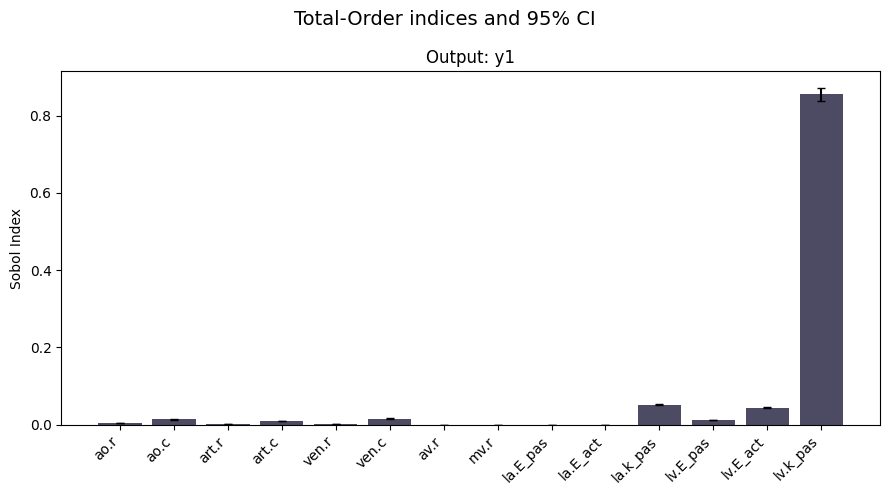

In [ ]:
sa.plot_sobol(sobol_df, index="ST", figsize=figsize) 

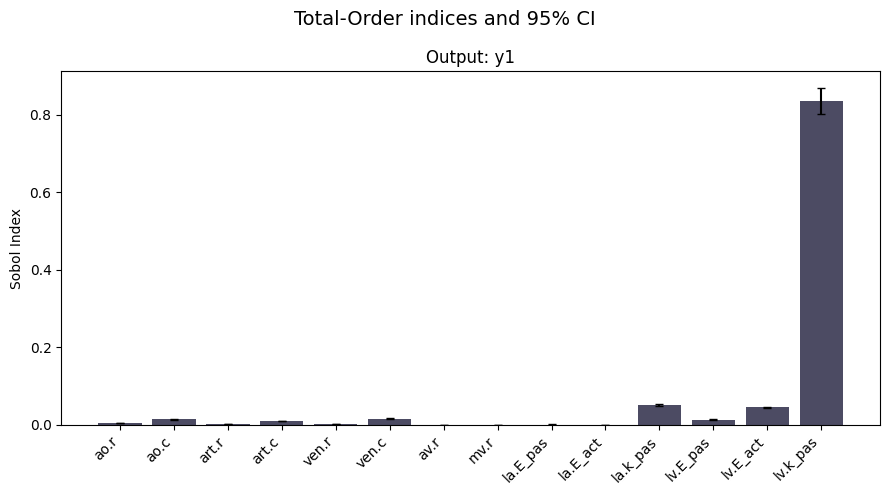

In [ ]:
sa.plot_sobol(sobol_df, index="ST", figsize=figsize) 

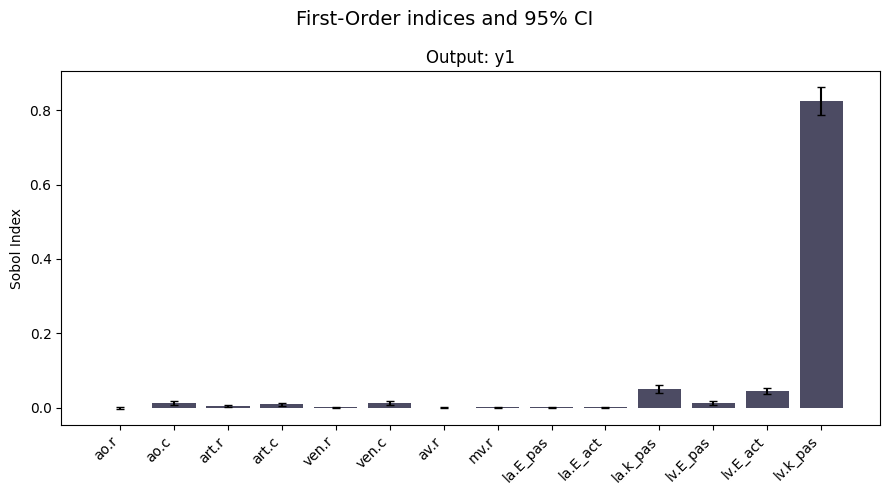

In [ ]:
sa.plot_sobol(sobol_df, index="S1", figsize=figsize) 